In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customer-data/Mall_Customers.csv


In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_csv("/kaggle/input/mall-customer-data/Mall_Customers.csv")
print(df.shape)
df.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [55]:
df = pd.get_dummies(df, prefix='gender')
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),gender_Female,gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [56]:
X = df.iloc[:, [2,3]].values    # 2 features(Annual Income, Spending Score)
X2 = df.iloc[:, 1:6].values

In [57]:
wcss=[]
wcss2=[]

# We always assume the max number of cluster would be 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=20)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)
    
    # inertia_ is the formular used to segregate the data points into clusters

In [58]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37455.984555160285,
 30241.34361793659,
 24990.4343103969,
 21797.08494464637,
 19636.753964898147]

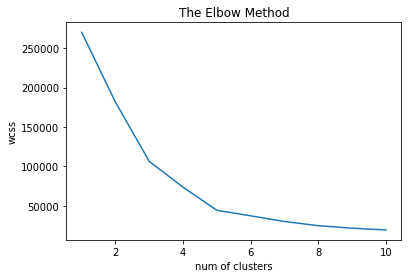

In [59]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('num of clusters')
plt.ylabel('wcss')
plt.show()

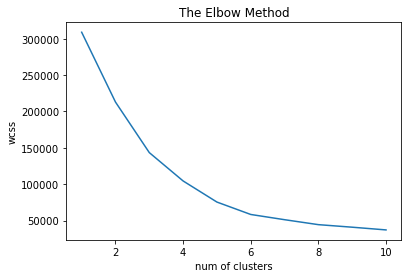

In [60]:
plt.plot(range(1,11), wcss2)
plt.title('The Elbow Method')
plt.xlabel('num of clusters')
plt.ylabel('wcss')
plt.show()

In [61]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=20)
y_kmeans = kmeansmodel.fit_predict(X)
y2_kmeans = kmeansmodel.fit_predict(X2)

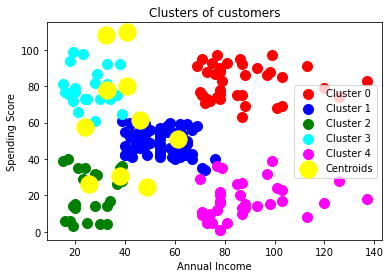

In [62]:
colors = ['red','blue','green','cyan','magenta']
for i in range(5):
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i}')
    i += 1
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Reference
https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation

In [ ]:
여러 feature들을 넣고 KMeans 돌리는 방법
centroid 가 다르게 나온 이유